In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/sumit/Downloads/titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


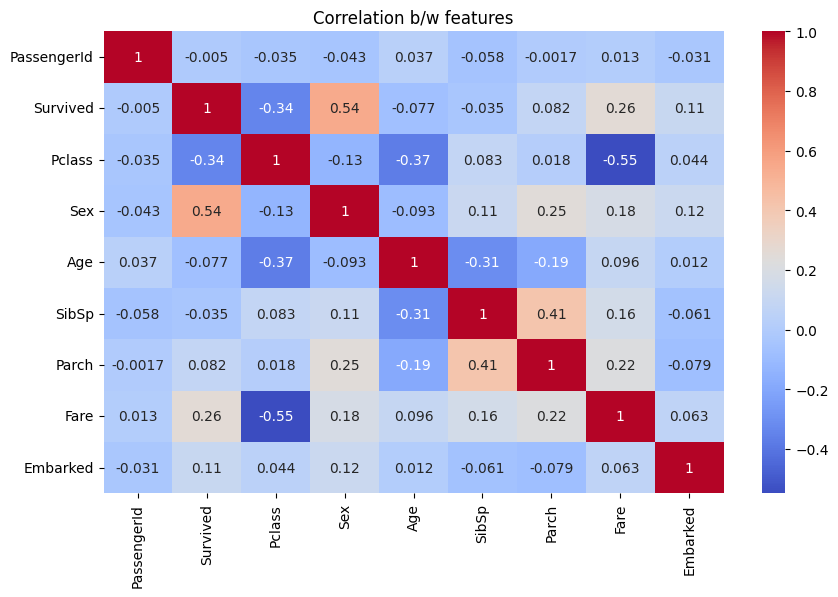

In [9]:
# Check Correlation Between Features

data_encoded = data.copy()
data_encoded["Sex"] = data_encoded["Sex"].map({"male":0 , "female":1})
data_encoded["Embarked"] = data_encoded["Embarked"].map({"S":0,"C":1,"Q":2})
corr_data = data_encoded.drop(columns=["Name","Ticket","Cabin"])

plt.figure(figsize=(10,6))
sns.heatmap(corr_data.corr(),annot = True,cmap = "coolwarm")
plt.title("Correlation b/w features")
plt.show()

In [10]:
#Which features are most correlated with survival?
corr = corr_data.corr()["Survived"].sort_values(ascending=False)
print(corr)


Survived       1.000000
Sex            0.543351
Fare           0.257307
Embarked       0.108669
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64


In [13]:
#Create New Feature: Family Size

data["FamilySize"] = data["SibSp"] + data["Parch"] +1
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1


Having a 2-4 Family size has highest survival rate as shown FamilySize
1     30.353818
2     55.279503
3     57.843137
4     72.413793
5     20.000000
6     13.636364
7     33.333333
8      0.000000
11     0.000000
Name: Survived, dtype: float64


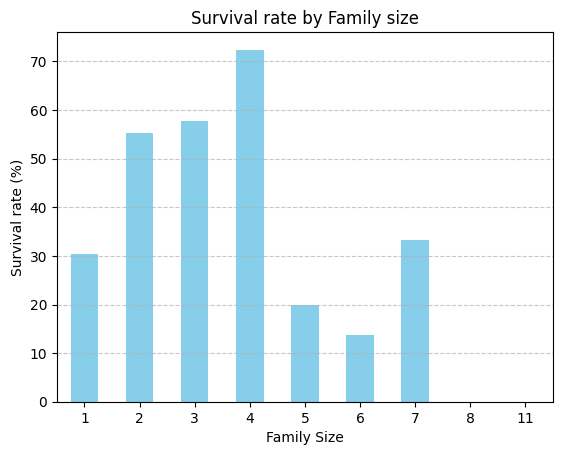

In [30]:
#Does having a larger family size help survival?
Survival_rate = data.groupby("FamilySize")["Survived"].mean()*100
print("Having a 2-4 Family size has highest survival rate as shown", Survival_rate)
Survival_rate.plot(kind ="bar",color = "Skyblue")
plt.title("Survival rate by Family size")
plt.ylabel("Survival rate (%)")
plt.xlabel("Family Size")
plt.xticks(rotation=0)
plt.grid(axis="y",linestyle = "--",alpha=0.7)
plt.show()

In [34]:
#Create Feature: IsAlone
data["IsAlone"] = (data["FamilySize"]==1).astype(int)
data[["IsAlone","FamilySize"]].head(5)


,IsAlone,FamilySize
0,0,2
1,0,2
2,1,1
3,0,2
4,1,1


In [35]:
survival_rate = data.groupby("IsAlone")["Survived"].mean()*100
survival_rate

IsAlone
0    50.564972
1    30.353818
Name: Survived, dtype: float64

In [37]:
survival_rate1 = data.groupby("IsAlone")["Survived"].agg(["count","sum"])
survival_rate1_agg = (survival_rate1["sum"]/survival_rate1["count"])*100
survival_rate1_agg

IsAlone
0    50.564972
1    30.353818
dtype: float64

In [44]:
#Age Binning (Group age into categories)
data["AgeGroup"] = pd.cut(data["Age"],bins=[0,12,21,35,50,80],labels=["Child","Teen","Adult","Mid","Old"])
data[["Age" ,"AgeGroup"]].head(10)     #Number of Bins = Number of Edges − 1

,Age,AgeGroup
0,22.0,Adult
1,38.0,Mid
2,26.0,Adult
3,35.0,Adult
4,35.0,Adult
5,NaN,NaN
6,54.0,Old
7,2.0,Child
8,27.0,Adult
9,14.0,Teen


C:\Users\sumit\AppData\Local\Temp\ipykernel_20356\3707988248.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_agegroup = data.groupby("AgeGroup")["Survived"].mean()*100


Survival rate by age group as follows AgeGroup
Child    57.971014
Teen     34.814815
Adult    40.955631
Mid      39.869281
Old      34.375000
Name: Survived, dtype: float64


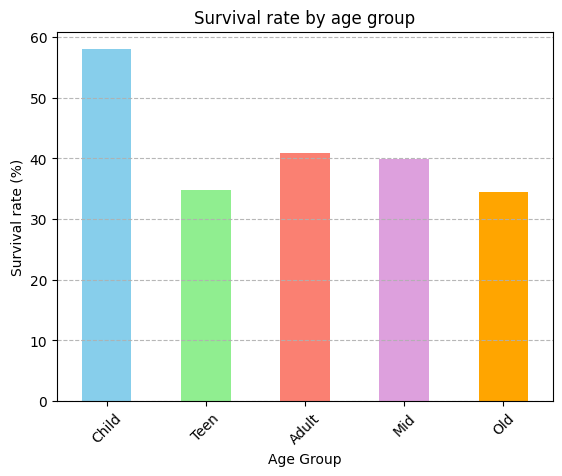

In [58]:
survival_rate_agegroup = data.groupby("AgeGroup")["Survived"].mean()*100
print("Survival rate by age group as follows",survival_rate_agegroup)
color = ["skyblue", "lightgreen", "salmon", "plum", "orange"]
survival_rate_agegroup.plot(kind = "bar",color = color) 
plt.title("Survival rate by age group")
plt.ylabel("Survival rate (%)")
plt.xlabel("Age Group")
plt.grid(axis ="y" ,linestyle = "--",alpha = 0.9)
plt.xticks(rotation=45)
plt.show()


In [59]:
#Save your cleaned/featured data
data.to_csv("titanic_cleaned_day8.csv" , index=False)

C:\Users\sumit\AppData\Local\Temp\ipykernel_20356\3682910031.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate = data.groupby("FarePaid")["Survived"].mean()*100


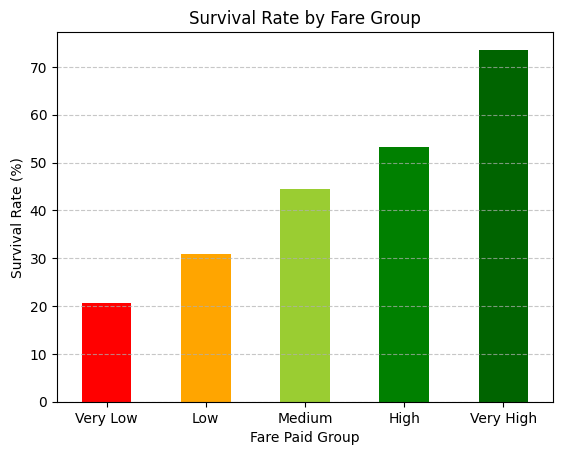

In [72]:
#Is there a relationship between fare paid and survival?

data["FarePaid"] = pd.cut(data["Fare"] , bins = [0, 7.91, 14.45, 31, 100, 600] , labels=["Very Low", "Low", "Medium", "High", "Very High"])
survival_rate = data.groupby("FarePaid")["Survived"].mean()*100
survival_rate
survival_rate.plot(kind='bar', color=['red', 'orange', 'yellowgreen', 'green', 'darkgreen'])
plt.title("Survival Rate by Fare Group")
plt.xlabel("Fare Paid Group")
plt.ylabel("Survival Rate (%)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()

In [73]:
#Which combination of class and gender had the highest survival rate?

class_gender_survive_rate = data.groupby(["Pclass","Sex"])["Survived"].mean()*100
class_gender_survive_rate

Pclass  Sex   
1       female    96.808511
        male      36.885246
2       female    92.105263
        male      15.740741
3       female    50.000000
        male      13.544669
Name: Survived, dtype: float64

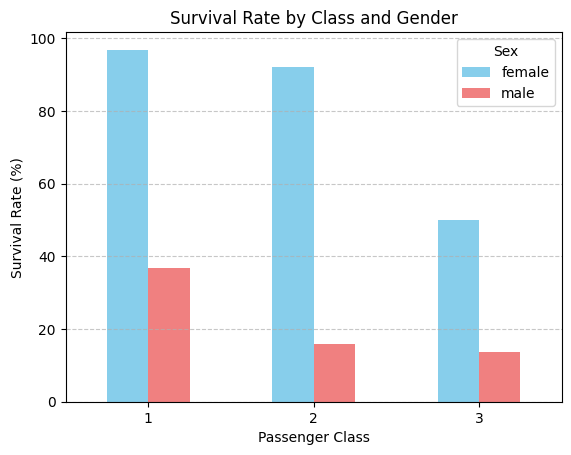

In [74]:
class_gender_survive_rate.unstack().plot(kind='bar', color=["skyblue", "lightcoral"])
plt.title("Survival Rate by Class and Gender")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Passenger Class")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Sex")
plt.show()